# Program for predicting term loan subscription

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fetch Data

In [4]:
bank_data=pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Projects/bank_data.csv",)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 2. Understand the data


In [5]:
print("Number of rows: ", len(bank_data))
print("Number of columns: ",len(bank_data.columns))
print("Number of rows and columns: ",bank_data.shape)
print("Number of elements: ",bank_data.size)
# print("Number of rows, columns, etc: ", bank_data.info())
# print ("Data type:\n",bank_data.dtypes)
# print ("Identify outliers & other info like Mean,median,max,min etc:\n\n",bank_data.describe())

Number of rows:  45211
Number of columns:  17
Number of rows and columns:  (45211, 17)
Number of elements:  768587


# 3. Check the 'Outcome'or 'dependant' variable columns


In [4]:
print ("Target column consists of: \n",bank_data.Target.value_counts())

Target column consists of: 
 no     39922
yes     5289
Name: Target, dtype: int64


                 =================Insight EDA.1 ==============



---Consists of Numerical & Categorical columns

---Need of Dummy Feature

---No Missing Value Problem

---Feature Engineering           
------Semi Automated Approach (visual) & ML Based Approach

---Class Imabalance Problem i.e. target column has 88% no compared to only 12% yes                        
------We need to treat the Class Imbalance Problem

# 4. convert Categorical varible of coulmn 'Target' into numerical value 

-------- No=0 --------

---------Yes=1--------

-----Store in a seperate column inside dataframe

In [5]:
target_catagorical = bank_data["Target"]
target_numerical = []

for value in target_catagorical:
    if value == "no":
        target_numerical.append(0)
    else:
        target_numerical.append(1)

In [6]:
#check the categorical and numerical values of taget column
print (len(target_catagorical))
print (len(target_numerical))

print (target_catagorical[:5])
print (target_numerical[:5])

45211
45211
0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object
[0, 0, 0, 0, 0]


In [7]:
#store numerical data into dataframe
bank_data["Target_Num"] = target_numerical
bank_data.Target_Num.value_counts()

0    39922
1     5289
Name: Target_Num, dtype: int64

# 5. Check the data for :
1. pairwise relationships between columns

2. outliers & dominance 

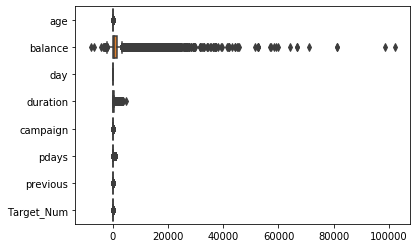

In [8]:
# Plot box plot to check for outliers
sns.boxplot(data=bank_data,orient="h")

In [9]:
# 1. Pair plot to observe the pairwise relationships in a dataset.

# sns.pairplot(data=bank_data)


          =================Insight EDA.2 ==============
---Outlier Problem

------it is clearly observed that "balance" & "Duration" column will dominate the outcome 

------Treat This

-----using the above pairplot we can infer that campaign value above 35 will result in 0 = No , So more than 35 campaigns will not make any sense


# 6. Feature Engineering using visual techniques

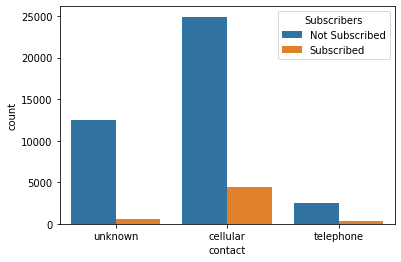

In [10]:
#Note: We always need to look for features with variation, means features which can help us in classifying different classes.
# print (bank_data["job"].value_counts())
sns.countplot(bank_data['contact'], data = bank_data, hue = 'Target')
plt.legend(title="Subscribers",labels=["Not Subscribed","Subscribed"])
plt.show()

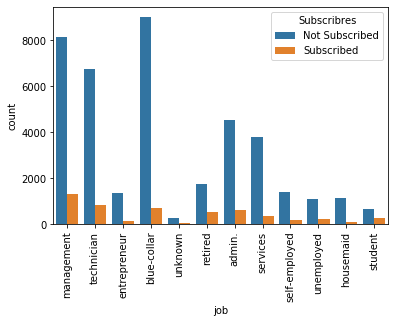

In [11]:
# print(bank_data.job.value_counts())
sns.countplot(bank_data['job'],data=bank_data, hue='Target')
plt.legend(title='Subscribres', labels=["Not Subscribed","Subscribed"])
plt.xticks(rotation=90)
plt.show()

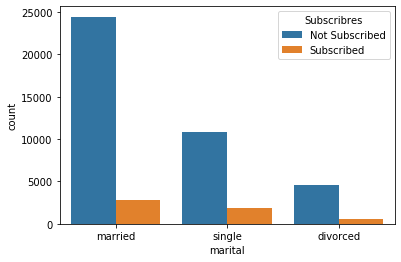

In [12]:
# print(bank_data.marital.value_counts())
sns.countplot(bank_data['marital'],data=bank_data, hue='Target')
plt.legend(title='Subscribres', labels=["Not Subscribed","Subscribed"])
plt.show()

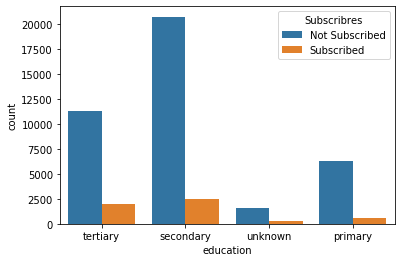

In [13]:
# print(bank_data.education.value_counts())
sns.countplot(bank_data['education'],data=bank_data, hue='Target')
plt.legend(title='Subscribres', labels=["Not Subscribed","Subscribed"])
plt.show()

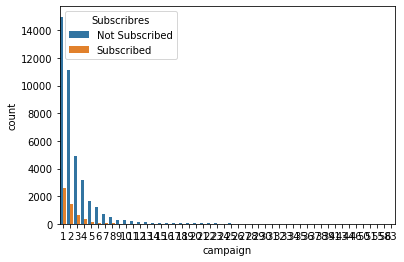

In [14]:
# print(bank_data.campaign.value_counts())
sns.countplot(bank_data['campaign'],data=bank_data, hue='Target')
plt.legend(title='Subscribres', labels=["Not Subscribed","Subscribed"])
plt.show()

Insight: Campaign is one important feature cellular and married seems to be important. 

# 7. Modeling Process

"""     Create Dummy variable for categorical columns
        before creating dummy variable we can drop few coulmns which may not impact your outcome """

In [15]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [16]:
bank_data = bank_data.drop(["contact"],axis=1)

In [17]:
categorical_column = ['job','marital','education','default','housing','loan','month','poutcome']
bank_data_dummy = pd.get_dummies(bank_data,columns=categorical_column)

In [18]:
bank_data_dummy.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'Target_Num', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# 7.1 without treating class imbalance problem

In [19]:
# Test & Train Split

X = bank_data_dummy.drop('Target',axis=1) #Input Data Set by droping Target
Y = bank_data_dummy[["Target"]] #Label or Outcome Column
# print("X: ",X.columns,"\n","Y: ",Y.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)
# random_state makes sure that the samples dataset remain the same for all day of the week.

In [20]:
print("Train data",x_train.shape,y_train.shape,"\nTest Data", x_test.shape,  y_test.shape)

Train data (36168, 49) (36168, 1) 
Test Data (9043, 49) (9043, 1)


In [21]:
# Apply Standardization & transformation of Features i.e. X values

from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

# no need to standardize Y data as its only one feature with value within range i.e. 0 & 1
x_train = x_train_scaled
x_test  = x_test_scaled

# print("Train Data after standardizing:",x_train)
# print("Test Data after standardizing:",x_test)

# Logistic Regression model

In [22]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import preprocessing

"""Prepare for cross validation using KFold Techniques
KFold is spliting data into several fold  (lets say 10) and testing 1st fold against rest 9 folds, procedure is repeated
untill 10th fold is tested against 1-9th fold and all the accuracy values is noted and average of all the accuracy value
gives the model accuracy"""

seed = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
LogReg = LogisticRegression(solver = 'lbfgs')  #LogReg_US = Under sampling & 'lbfgs'= gradient decent optimization
LogReg.fit(x_train, y_train)

# Predicting for test set
y_pred = LogReg.predict(x_test)

cross_validation_result = model_selection.cross_val_score(LogReg, x_train, y_train, cv=kfold, scoring='accuracy')
# print(cross_validation_result)

cls_report = classification_report(y_test, y_pred,output_dict=True)
# print (cls_report)

print (classification_report(y_test,y_pred))

C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      8027
         yes       1.00      1.00      1.00      1016

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



# 7.2 Under sampling 

# Treating Class Imbalance Problem

In [23]:
# Treating the class imbalacne problem
from sklearn.utils import resample


banking_df_majority = bank_data_dummy[bank_data_dummy.Target == "no"]
banking_df_minority = bank_data_dummy[bank_data_dummy.Target == "yes"]

# print (banking_df_majority.Target.value_counts())
# print (banking_df_minority.Target.value_counts())

# Downsampling Majority Class
majority_down = resample(banking_df_majority, replace=False,
                                   n_samples=7000, random_state=123)

# print (majority_down.shape)

banking_down_sample_df = pd.concat([majority_down,banking_df_minority])

# print (banking_down_sample_df.Target.value_counts())


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X1 = banking_down_sample_df.drop('Target',axis=1) #Input Data Set
Y1 = banking_down_sample_df[["Target"]] #Label or Outcome Column

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20, random_state=7)
# random_state makes sure that the samples dataset remain the same for all day of the week.

In [25]:
print("Train data",x_train.shape,y_train.shape,"\nTest Data", x_test.shape,  y_test.shape)

Train data (9831, 49) (9831, 1) 
Test Data (2458, 49) (2458, 1)


In [26]:
print(y_train.Target.value_counts())
print(y_test.Target.value_counts())

no     5588
yes    4243
Name: Target, dtype: int64
no     1412
yes    1046
Name: Target, dtype: int64


In [27]:
#Transformation of Features i.e. X values

from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

x_train = x_train_scaled
x_test  = x_test_scaled

# print("Train Data after standardizing:",x_train)
# print("Test Data after standardizing:",x_test)

In [28]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import preprocessing

#Prepare for cross validation
seed = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
LogReg_US = LogisticRegression(solver = 'lbfgs')  #LogReg_US = Under sampling & 'lbfgs'= gradient decent optimization
LogReg_US.fit(x_train, y_train)

# Predicting for test set
y_pred = LogReg_US.predict(x_test)

cross_validation_result = model_selection.cross_val_score(LogReg_US, x_train, y_train, cv=kfold, scoring='accuracy')
print(cross_validation_result)

cls_report = classification_report(y_test, y_pred,output_dict=True)
# print (cls_report)

print (classification_report(y_test,y_pred))

C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1412
         yes       1.00      1.00      1.00      1046

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458



# 7.3 Over sampling

In [29]:
# Code for Oversampling

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

print (bank_data.shape)
# print (bank_data.head())

predictors = bank_data.iloc[:,0:15]
# print(predictors.head())

# # predictors = predictors.drop(['pdays'],axis=1)
X2 = pd.get_dummies(predictors)
Y2 = bank_data.iloc[:,15]

# print(Y2)


# #  Oversampling Technique

from imblearn.over_sampling import RandomOverSampler, SMOTE

# 1. random Oversampling

# over_sampler = RandomOverSampler(random_state=0)
# x_over, y_over = over_sampler.fit_resample(X2, Y2)

# X2 = x_over
# Y2 = y_over

# 2. SMOTE - Synthetic Minority Oversampling Technique

smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(X2, Y2)
pd.Series(y_smote).value_counts()

print (pd.Series(y_smote).value_counts())

X2 = x_smote
Y2 = y_smote

(45211, 17)
yes    39922
no     39922
Name: Target, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.20, random_state=7)
# random_state makes sure that the samples dataset remain the same for all day of the week.

In [31]:
#Transformation of Features i.e. X values

from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

x_train = x_train_scaled
x_test  = x_test_scaled

# print("Train Data after standardizing:",x_train)
# print("Test Data after standardizing:",x_test)

In [32]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import preprocessing

#Prepare for cross validation
seed = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
LogReg_OS = LogisticRegression(solver = 'lbfgs')  #LogReg_US = Under sampling & 'lbfgs'= gradient decent optimization
LogReg_OS.fit(x_train, y_train)

# Predicting for test set
y_pred = LogReg_OS.predict(x_test)

cross_validation_result = model_selection.cross_val_score(LogReg_OS, x_train, y_train, cv=kfold, scoring='accuracy')
print(cross_validation_result)

cls_report = classification_report(y_test, y_pred,output_dict=True)
# print (cls_report)

print (classification_report(y_test,y_pred))

C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


[0.94098309 0.94646212 0.9467752  0.94051346 0.94004383 0.94770628
 0.93768592 0.93940817 0.94520119 0.94723657]
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7926
         yes       0.98      0.91      0.94      8043

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

